In [ ]:
from functions import *

In [2]:
features_train = read_ds_gzip("../in-star-craft-2-player/TRAIN_LONG.CSV.GZ", "TRAIN")

In [3]:
features_train

,battleneturl,played_race,0,1,2,3,4,5,6,7,...,26813,26814,26815,26816,26817,26818,26819,26820,26821,26822
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,6:CameraEvent:26.0:155.7578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,25:TargetPointCommandEvent:27.7021484375:162.0...,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,43:SelectionEvent:Probe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,6:CameraEvent:158.0:24.7578125,21:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,29:BasicCommandEvent:TrainProbe,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,4:CameraEvent:140.0:24.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,18:SelectionEvent:Probe;Probe,21:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Probe,30:TargetUnitCommandEvent:CAbil:MineralField,34:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,5:CameraEvent:28.0:135.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,20:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,32:SelectionEvent:Probe,34:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,5:CameraEvent:20.0:37.2578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,24:TargetUnitCommandEvent:CAbil:MineralField,29:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,4:CameraEvent:22.0:136.7578125,13:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,17:SelectionEvent:SCV;SCV,18:TargetPointCommandEvent:20.1879882812:136.9...,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:OrbitalCommand,32:SelectionEvent:SCV;SCV;SCV;SCV;SCV;SCV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3048,http://xx.battle.net/sc2/en/profile/410/1/STBo...,Terran,5:CameraEvent:158.0:24.7578125,14:SelectionEvent:OrbitalCommand,16:BasicCommandEvent:TrainSCV,22:TargetUnitCommandEvent:CAbil:MineralField,48:SelectionEvent:SCV,52:TargetUnitCommandEvent:CAbil:MineralField,56:TargetUnitCommandEvent:CAbil:MineralField,60:ControlGroupEvent:1:0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,Terran,4:CameraEvent:158.0:155.7578125,14:SelectionEvent:OrbitalCommandFlying,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,20:TargetPointCommandEvent:156.681396484:160.1...,24:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommandFlying,34:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,Terran,5:CameraEvent:26.99609375:134.7578125,14:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,21:TargetUnitCommandEvent:CAbil:MineralField,25:ControlGroupEvent:1:0,28:SelectionEvent:OrbitalCommand,28:ControlGroupEvent:2:0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
features_train["first_nan_index"] = features_train.apply(first_nan_occurrence, axis=1)

In [5]:
features_train["first_nan_index"] = pd.to_numeric(
    features_train["first_nan_index"], errors="coerce"
)

In [6]:
def max_t_value_long(row):
    if pd.isna(row["first_nan_index"]):
        first_nan_index = 0
        return row.iloc[0]
    else:
        first_nan_index = int(row["first_nan_index"])
        cell = row.iloc[first_nan_index + 1]
    return cell.split(":")[0]

In [7]:
features_train["max_t_value"] = features_train.apply(max_t_value_long, axis=1)

In [8]:
features_train["max_t_value"] = pd.to_numeric(
    features_train["max_t_value"], errors="coerce"
)

In [9]:
features_train["max_t_value"] = features_train["max_t_value"] / 16

In [10]:
features_train["action_per_sec"] = (
    features_train["first_nan_index"] / features_train["max_t_value"]
)

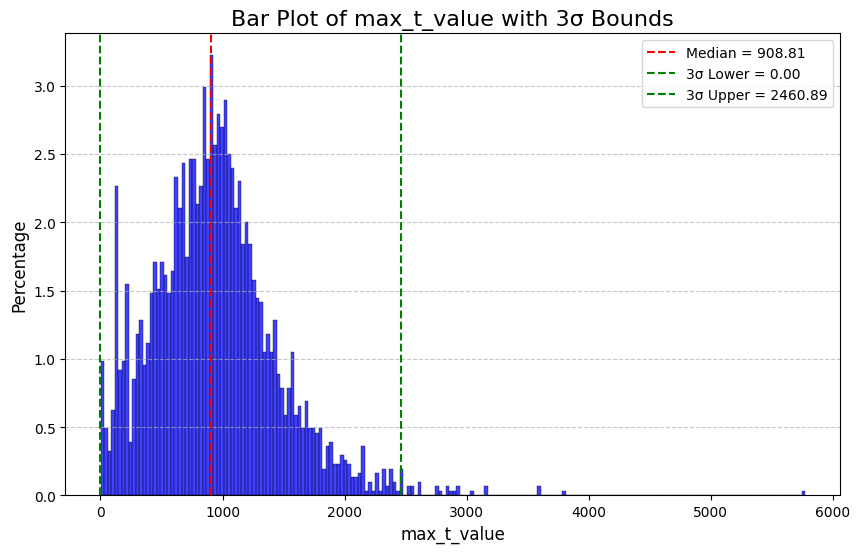

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data preparation
data = features_train["max_t_value"].dropna()
mean = data.mean()
std = data.std()
median = data.median()
lower_bound = max(0, mean - 3 * std)
upper_bound = mean + 3 * std

# Plotting the barplot with y-axis in percentages
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=200, kde=False, color="blue", stat="percent")
plt.axvline(median, color="red", linestyle="--", label=f"Median = {median:.2f}")
plt.axvline(
    lower_bound, color="green", linestyle="--", label=f"3σ Lower = {lower_bound:.2f}"
)
plt.axvline(
    upper_bound, color="green", linestyle="--", label=f"3σ Upper = {upper_bound:.2f}"
)

# Adding titles and labels
plt.title("Bar Plot of max_t_value with 3σ Bounds", fontsize=16)
plt.xlabel("max_t_value", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [12]:
data = features_train["max_t_value"].dropna()

# Calculate mean, median, and standard deviation
d_mean = data.mean()
median = data.median()
std = data.std()

# Calculate 3σ bounds and ensure the lower bound is not negative
lower_bound = max(d_mean - 3 * std, 0)  # Ensure lower bound is at least 0
upper_bound = d_mean + 3 * std

# Filter the entire DataFrame based on 'max_t_value' being within the 2σ bounds
filtered_features_train = features_train[
    features_train["max_t_value"].between(lower_bound, upper_bound)
]

In [13]:
filtered_features_train["played_protoss"] = (
    filtered_features_train["played_race"] == "Protoss"
).astype(int)
filtered_features_train["played_terran"] = (
    filtered_features_train["played_race"] == "Terran"
).astype(int)
filtered_features_train["played_zerg"] = (
    filtered_features_train["played_race"] == "Zerg"
).astype(int)

/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_31422/2293811355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features_train["played_protoss"] = (
/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_31422/2293811355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_features_train["played_terran"] = (
/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_31422/2293811355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [14]:
filtered_features_train = filtered_features_train.drop(columns=["played_race"])

In [15]:
def train_unit_per_sec(row):
    train_count = 0

    for value in row:
        value_str = str(value)

        train_count += value_str.count("BasicCommandEvent:Train")

    max_t_value = row["max_t_value"]

    return train_count / max_t_value if max_t_value > 0 else 0

In [20]:
def camera_per_sec(row):
    camera_count = 0

    for value in row:
        value_str = str(value)

        camera_count += value_str.count("CameraEvent")

    max_t_value = row["max_t_value"]

    return camera_count / max_t_value if max_t_value > 0 else 0

In [21]:
filtered_features_train["train_unit_per_sec"] = filtered_features_train.apply(
    train_unit_per_sec, axis=1
)

filtered_features_train["camera_per_sec"] = filtered_features_train.apply(
    camera_per_sec, axis=1
)
filtered_features_train

,battleneturl,0,1,2,3,4,5,6,7,8,...,26821,26822,first_nan_index,max_t_value,action_per_sec,played_protoss,played_terran,played_zerg,train_unit_per_sec,camera_per_sec
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,6:CameraEvent:26.0:155.7578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,25:TargetPointCommandEvent:27.7021484375:162.0...,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,43:SelectionEvent:Probe,44:TargetPointCommandEvent:26.1865234375:161.0...,...,NaN,NaN,6693.0,1654.7500,4.044720,1,0,0,0.049554,0.995921
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,6:CameraEvent:158.0:24.7578125,21:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,29:BasicCommandEvent:TrainProbe,32:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,49:SelectionEvent:Probe,...,NaN,NaN,897.0,240.6250,3.727792,1,0,0,0.411429,6.462338
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,4:CameraEvent:140.0:24.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,18:SelectionEvent:Probe;Probe,21:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Probe,30:TargetUnitCommandEvent:CAbil:MineralField,34:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,...,NaN,NaN,3495.0,892.2500,3.917064,1,0,0,0.070608,0.947044
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,5:CameraEvent:28.0:135.7578125,14:SelectionEvent:Nexus,16:BasicCommandEvent:TrainProbe,20:SelectionEvent:Probe;Probe,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:Nexus,32:SelectionEvent:Probe,34:TargetUnitCommandEvent:CAbil:MineralField,49:SelectionEvent:Probe,...,NaN,NaN,892.0,254.6875,3.502331,1,0,0,0.337669,3.608344
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,5:CameraEvent:20.0:37.2578125,16:SelectionEvent:Nexus,18:BasicCommandEvent:TrainProbe,21:SelectionEvent:Probe;Probe,24:TargetUnitCommandEvent:CAbil:MineralField,29:SelectionEvent:Probe,33:TargetUnitCommandEvent:CAbil:MineralField,40:SelectionEvent:Nexus,44:TargetUnitCommandEvent:CAbil:MineralField,...,NaN,NaN,1967.0,539.4375,3.646391,1,0,0,0.051906,0.876839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:22.0:136.7578125,13:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,17:SelectionEvent:SCV;SCV,18:TargetPointCommandEvent:20.1879882812:136.9...,22:TargetUnitCommandEvent:CAbil:MineralField,28:SelectionEvent:OrbitalCommand,32:SelectionEvent:SCV;SCV;SCV;SCV;SCV;SCV,37:SelectionEvent:OrbitalCommand,...,NaN,NaN,3849.0,763.1250,5.043735,0,1,0,0.179525,1.299918
3048,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:158.0:24.7578125,14:SelectionEvent:OrbitalCommand,16:BasicCommandEvent:TrainSCV,22:TargetUnitCommandEvent:CAbil:MineralField,48:SelectionEvent:SCV,52:TargetUnitCommandEvent:CAbil:MineralField,56:TargetUnitCommandEvent:CAbil:MineralField,60:ControlGroupEvent:1:0,63:SelectionEvent:OrbitalCommand,...,NaN,NaN,6053.0,1109.1250,5.457455,0,1,0,0.265975,1.070213
3049,http://xx.battle.net/sc2/en/profile/405/1/MMA/,4:CameraEvent:158.0:155.7578125,14:SelectionEvent:OrbitalCommandFlying,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,20:TargetPointCommandEvent:156.681396484:160.1...,24:TargetUnitCommandEvent:CAbil:MineralField,30:SelectionEvent:OrbitalCommandFlying,34:TargetUnitCommandEvent:CAbil:MineralField,36:ControlGroupEvent:1:0,...,NaN,NaN,2070.0,392.3750,5.275565,0,1,0,0.644791,3.675056
3050,http://xx.battle.net/sc2/en/profile/410/1/STBo...,5:CameraEvent:26.99609375:134.7578125,14:SelectionEvent:OrbitalCommand,14:BasicCommandEvent:TrainSCV,18:SelectionEvent:SCV,21:TargetUnitCommandEvent:CAbil:MineralField,25:ControlGroupEvent:1:0,28:SelectionEvent:OrbitalCommand,28:ControlGroupEvent:2:0,33:SelectionEvent:SCV;SCV;SCV;SCV;SCV,...,NaN,NaN,3276.0,583.6875,5.612592,0,1,0,0.104508,0.503694


In [22]:
simple_data = filtered_features_train[
    [
        "battleneturl",
        "max_t_value",
        "action_per_sec",
        "played_protoss",
        "played_terran",
        "played_zerg",
        "train_unit_per_sec",
        "camera_per_sec",
        # "actions_before_t5",
        # "actions_before_t10",
        # "max_actions_between_t",
        # "min_actions_between_t",
    ]
]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = simple_data.drop(["battleneturl"], axis=1)
y = simple_data["battleneturl"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=30,
    max_features="log2",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

                                                             precision    recall  f1-score   support

      http://eu.battle.net/sc2/en/profile/1021189/1/Dayshi/     0.0000    0.0000    0.0000         3
 http://eu.battle.net/sc2/en/profile/1058669/1/EmpireHappy/     1.0000    1.0000    1.0000         1
       http://eu.battle.net/sc2/en/profile/1058669/1/Happy/     0.0000    0.0000    0.0000         2
  http://eu.battle.net/sc2/en/profile/1139573/1/BabyKnight/     0.0000    0.0000    0.0000         2
    http://eu.battle.net/sc2/en/profile/1143713/1/uThermal/     0.3333    0.3333    0.3333         3
http://eu.battle.net/sc2/en/profile/1173786/1/VPbenQsLivko/     0.3333    0.5000    0.4000         2
    http://eu.battle.net/sc2/en/profile/1430346/1/ShoWTimE/     0.0000    0.0000    0.0000         1
     http://eu.battle.net/sc2/en/profile/2048063/1/AcerBly/     0.0000    0.0000    0.0000         3
    http://eu.battle.net/sc2/en/profile/2101268/1/Stephano/     0.0000    0.0000    0.0000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn